In [1]:
# Import dependencies
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import selenium
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
# Visit the Mars Facts site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [4]:
# Read table with Pandas
table_df = pd.read_html(url)[0]
table_df.head(10)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
5,57,2012-08-21,15,158,6,-78.0,740.0
6,68,2012-08-22,16,158,6,-77.0,740.0
7,79,2012-08-23,17,159,6,-76.0,742.0
8,112,2012-08-27,21,161,6,-74.0,741.0
9,114,2012-08-28,22,162,6,-74.0,742.0


In [5]:
# Check data types
table_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [6]:
# Edit Data types
table_df['terrestrial_date'] = pd.to_datetime(table_df['terrestrial_date'], format='%Y-%m-%d')
table_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [7]:
# Question 1: How many months exist on Mars?

# Answer: 12

# Solution
len(table_df['month'].unique())

12

In [8]:
# Question 2: How many Martian (and not Earth) days worth of data exist in the scraped dataset?

# Answer: 1867

# Solution
len(table_df['sol'].unique())

1867

Text(0, 0.5, 'Temperature')

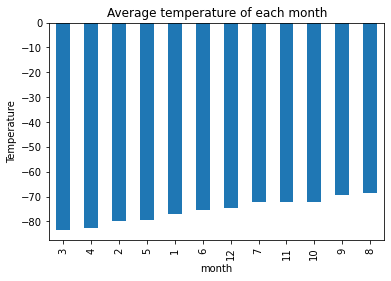

In [9]:
# Question 3: What are the coldest and the warmest months on Mars (at the location of Curiosity)?
# Get the answer by averaging the minimum daily temperature of all the months.
# Plot the results as a bar chart.

# Answer: Coldest month: 3, Warmest month: 8

# Solution
data_grouped_by_month = table_df.groupby('month')['min_temp'].mean().sort_values()
data_grouped_by_month.plot.bar(x='index', y='min_temp', title='Average temperature of each month')
plt.ylabel('Temperature')

Text(0, 0.5, 'Pressure')

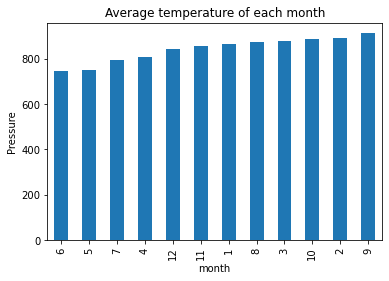

In [10]:
# Question 4: Which months have the lowest and the highest atmospheric pressure on Mars?
# Get the answer by averaging the daily atmospheric pressure of all the months.
# Plot the results as a bar chart.

# Answer: Lowest atmospheric pressure: month 6, Highest atmospheric pressure: month 9

# Solution
data_grouped_by_month = table_df.groupby('month')['pressure'].mean().sort_values()
data_grouped_by_month.plot.bar(x='index', y='pressure', title='Average temperature of each month')
plt.ylabel('Pressure')

<AxesSubplot:xlabel='terrestrial_date'>

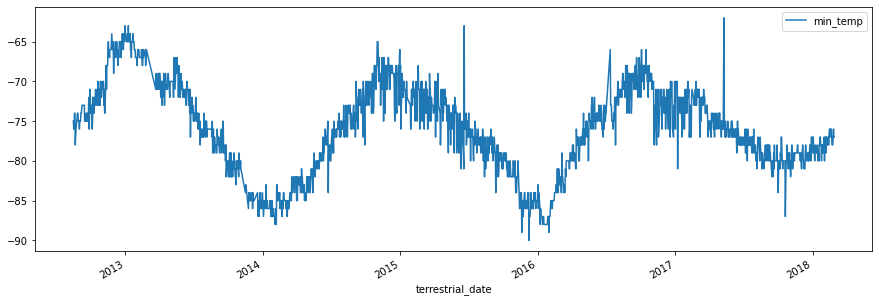

In [11]:
# Question 4: About how many terrestrial (Earth) days exist in a Martian year?
# That is, in the time that Mars circles the Sun once, how many days elapse on Earth?
# Visually estimate the result by plotting the daily minimum temperature.

# Answer: A little less than two Earth Years, I would say 650-700 Earth days

# Solution
table_df.plot(x='terrestrial_date', y='min_temp', figsize=(15,5))

In [12]:
# Export the DataFrame to a csv file
table_df.to_csv(os.path.join('Output', 'mars_temperature_data.csv'))

In [13]:
browser.quit()